In [105]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt ,seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [107]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Salary_Data.csv")

In [109]:
df

,YearsExperience,Salary,Height
0,1.1,39343,176
1,1.3,46205,175
2,1.5,37731,164
3,2.0,43525,178
4,2.2,39891,178
5,2.9,56642,178
6,3.0,60150,178
7,3.2,54445,178
8,3.2,64445,178
9,3.7,57189,178


In [111]:
df.head(3)

,YearsExperience,Salary,Height
0,1.1,39343,176
1,1.3,46205,175
2,1.5,37731,164


In [113]:
df.drop(['Height'],axis = 1,inplace=True)

In [115]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


HW Build linear regression model on the same data

In [118]:
x= df.drop('Salary',axis = 1)
y = df['Salary']

In [120]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

In [122]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,Y_train)
                                

DecisionTreeRegressor(random_state=0)

In [124]:
Y_pred_train = dt_regressor.predict(X_train)
r2_score(Y_train,Y_pred_train)

0.9971006453393606

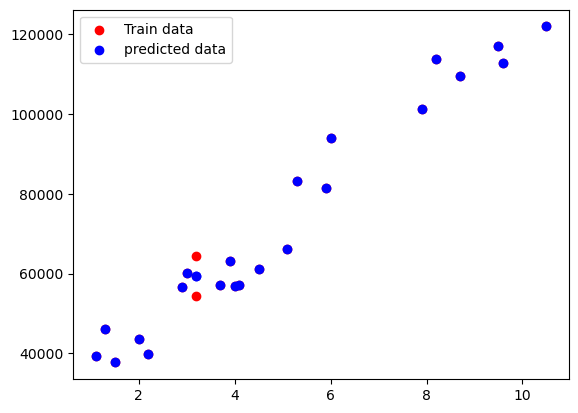

In [126]:
fig,ax = plt.subplots()
ax.scatter(X_train,Y_train,color = 'red',label = 'Train data')
ax.scatter(X_train,Y_pred_train,color = 'blue',label = 'predicted data')
ax.legend()
plt.show()

In [128]:
Y_pred = dt_regressor.predict(X_test)
r2_score(Y_test,Y_pred)

0.9887060585499007

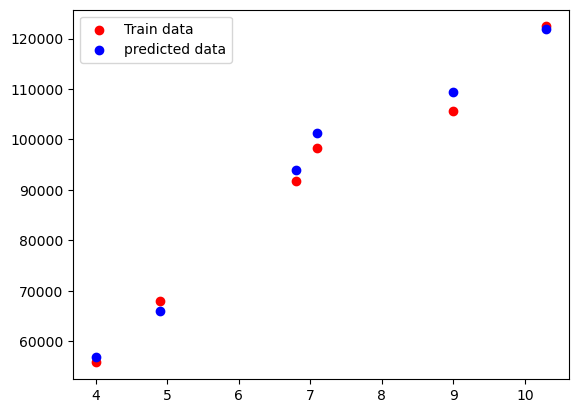

In [130]:
fig,ax = plt.subplots()
ax.scatter(X_test,Y_test,color = 'red',label = 'Train data')
ax.scatter(X_test,Y_pred,color = 'blue',label = 'predicted data')
ax.legend()
plt.show()

In [139]:
param_grid = {
    'max_depth' :[80,90,70,None],
    'max_features' :['sqrt','log2',None],
    'min_samples_leaf':[1,3,5],
    'min_samples_split': [2,3,4],
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random']
    
}

In [141]:
rf= DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 10,verbose =2,scoring = 'r2',n_jobs = -1)
rf1 = grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


In [142]:
grid_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

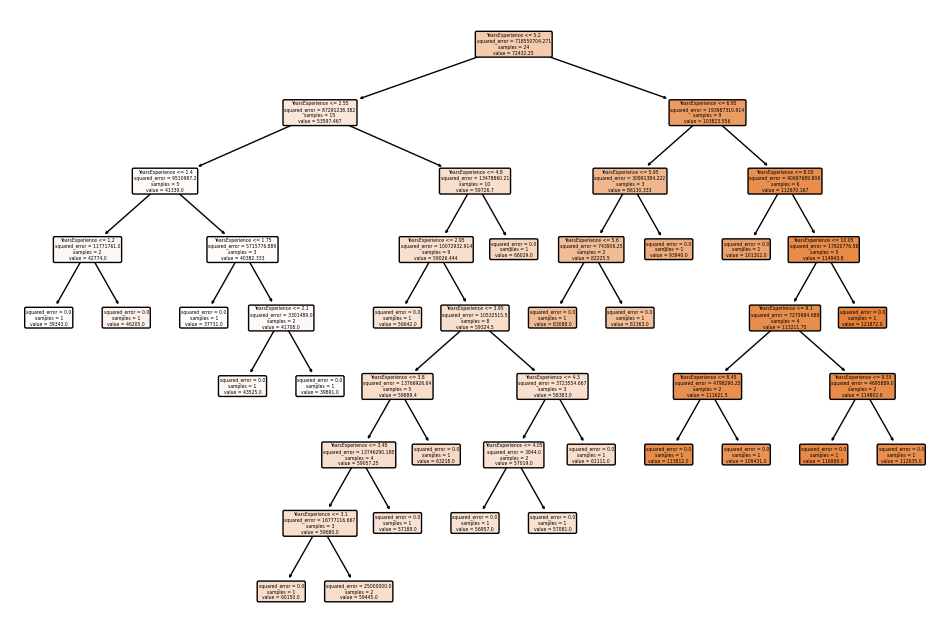

In [147]:
from sklearn.tree import plot_tree
plt.figure(figsize = (12,8))
plot_tree(dt_regressor,feature_names = x.columns, filled = True, rounded= True)
plt.show()